# Lost values analysis

In [37]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# global
data_path = '../Data/'
plt.interactive(True)

In [38]:
def extract_info(df):
    nrows = len(df)
    nullsum = df.isnull().sum().rename('null_count')
    nullper100 = nullsum.apply(lambda x: (100*x)/nrows)
    nullper100 = nullper100.rename('null_percentage')
    df_types = df.dtypes.rename('dtypes')
    info_series = pd.concat([nullsum, nullper100, df_types], axis=1)
    return info_series

In [39]:
def plot_lost_values_percent(percent_series):    
    # These are the "Tableau 20" colors as RGB.
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)
    # plot figure size
    plt.figure(figsize=(20, 15))
    # remove top and right and ensure it shows only left and bottom framelines.
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    # limit y range
    plt.ylim(0, 50)
    # ticks font and change yticks names
    ticks_range_values_y = range(0, 50, 10)
    plt.yticks(ticks_range_values_y, [str(x) + "%" for x in ticks_range_values_y], fontsize=14)    
    plt.xticks(fontsize=14)   
    # yticks lines across plot to help readability
    max_range_x = len(percent_series.values) + 1
    range_values_y = range(5, 50, 5)
    for y in range_values_y:
        plt.plot(range(0, max_range_x), [y] * len(range(0, max_range_x)), "--", lw=0.5, color="black", alpha=0.3)

    plt.title("Dataset missing values per feature percentage")
    percent_series.plot.bar(color=tableau20)

In [40]:
# load train.csv
df_train = pd.read_csv(data_path + 'train.csv', nrows=None, dtype={'target': np.uint8})
print('nrows: {}\n'.format(len(df_train)))
print('Memory consumed by dataframe : {} MB\n'.format(df_train.memory_usage(index=True).sum() / 1024 ** 2))
extract_info(df_train)

nrows: 7377418

Memory consumed by dataframe : 288.46189308166504 MB



,null_count,null_percentage,dtypes
msno,0,0.000000,object
song_id,0,0.000000,object
source_system_tab,24849,0.336825,object
source_screen_name,414804,5.622618,object
source_type,21539,0.291959,object
target,0,0.000000,uint8


In [41]:
# load members.csv
df_members = pd.read_csv(data_path + 'members.csv')
print('nrows: {}\n'.format(len(df_members)))
print('Memory consumed by dataframe : {} MB\n'.format(df_members.memory_usage(index=True).sum() / 1024 ** 2))
extract_info(df_members)

nrows: 34403

Memory consumed by dataframe : 1.8373947143554688 MB



,null_count,null_percentage,dtypes
msno,0,0.000000,object
city,0,0.000000,int64
bd,0,0.000000,int64
gender,19902,57.849606,object
registered_via,0,0.000000,int64
registration_init_time,0,0.000000,int64
expiration_date,0,0.000000,int64


In [42]:
# load songs.csv
df_songs = pd.read_csv(data_path + 'songs.csv', nrows=None)
print('nrows: {}\n'.format(len(df_songs)))
print('Memory consumed by dataframe : {} MB\n'.format(df_songs.memory_usage(index=True).sum() / 1024 ** 2))
extract_info(df_songs)

nrows: 2296320

Memory consumed by dataframe : 122.63679504394531 MB



,null_count,null_percentage,dtypes
song_id,0,0.000000,object
song_length,0,0.000000,int64
genre_ids,94116,4.098558,object
artist_name,0,0.000000,object
composer,1071354,46.655257,object
lyricist,1945268,84.712409,object
language,1,0.000044,float64


In [43]:
# load song_extra_info.csv
df_song_extra = pd.read_csv(data_path + 'song_extra_info.csv', nrows=None)
print('nrows: {}\n'.format(len(df_song_extra)))
print('Memory consumed by dataframe : {} MB\n'.format(df_song_extra.memory_usage(index=True).sum() / 1024 ** 2))
extract_info(df_song_extra)

nrows: 2295971

Memory consumed by dataframe : 52.550682067871094 MB



,null_count,null_percentage,dtypes
song_id,0,0.000000,object
name,2,0.000087,object
isrc,136548,5.947288,object


In [44]:
# merge
# important: gc calls help performance (a lot) and can avoid a lot of problems.
df_merged = df_train.merge(df_members, on='msno', how='left')
del df_train, df_members
gc.collect()
df_merged = df_merged.merge(df_songs, on='song_id', how='left')
del df_songs
gc.collect()
df_merged = df_merged.merge(df_song_extra, on='song_id', how='left')
del df_song_extra
gc.collect()
print('nrows: {}\n'.format(len(df_merged)))
print('Memory consumed by dataframe : {} MB\n'.format(df_merged.memory_usage(index=True).sum() / 1024 ** 2))
merged_info = extract_info(df_merged)
merged_info

nrows: 7377418

Memory consumed by dataframe : 1132.7403049468994 MB



,null_count,null_percentage,dtypes
msno,0,0.000000,object
song_id,0,0.000000,object
source_system_tab,24849,0.336825,object
source_screen_name,414804,5.622618,object
source_type,21539,0.291959,object
target,0,0.000000,uint8
city,0,0.000000,int64
bd,0,0.000000,int64
gender,2961479,40.142486,object
registered_via,0,0.000000,int64


In [45]:
df_merged.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language', 'name', 'isrc'],
      dtype='object')

In [46]:
df_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


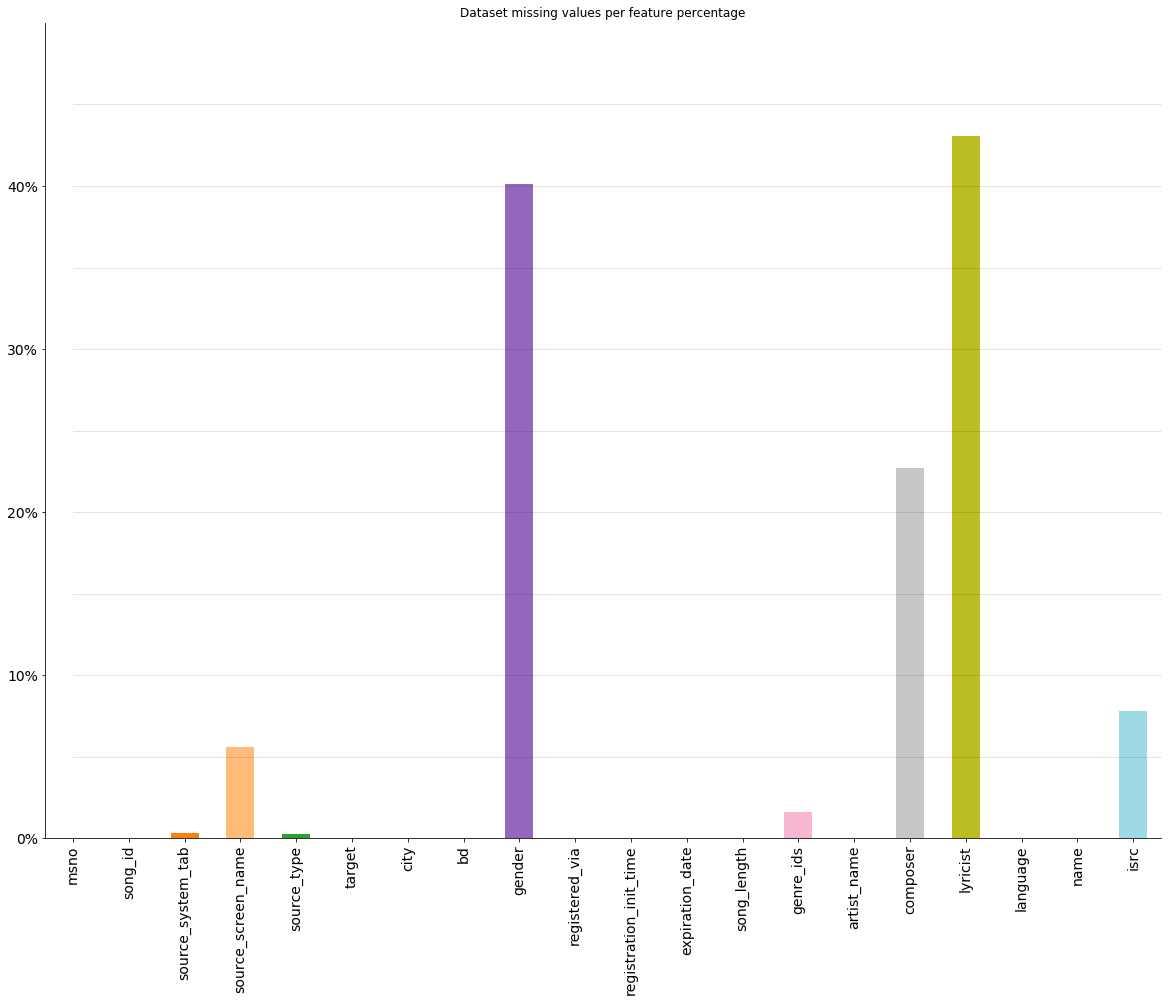

In [47]:
plot_lost_values_percent(merged_info['null_percentage'])